In [14]:
## وارد کردن کتابخانه TensorFlow با نام  tf
import tensorflow as tf
# چاپ نسخه‌ی TensorFlow که نصب شده است
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.15.0


In [15]:

# وارد کردن دیتاست Fashion MNIST از TensorFlow
fashion_mnist = tf.keras.datasets.fashion_mnist
# بارگذاری داده‌های آموزشی و آزمایشی از دیتاست Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# نرمال‌سازی مقادیر پیکسل‌های داده‌های آموزشی و آزمایشی برای قرار گرفتن بین 0 و 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [16]:
# وارد کردن کتابخانه matplotlib برای ترسیم نمودارها
import matplotlib.pyplot as plt
# تنظیمات برای نمایش نمودارها در یک لاین

%matplotlib inline

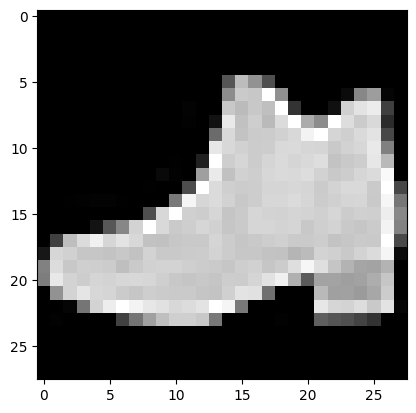

In [17]:
# یه نمونه رو رسم کردیم
sample = 15
image = x_train[sample]
# و plot این نمونه را نیز رسم کردیم
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [5]:
# تعیین تعداد تصاویر برای نمایش
num = 9
# انتخاب اولین num تصویر از داده‌های آموزشی
images = x_train[:num]
# انتخاب اولین num برچسب از داده‌های آموزشی
labels = y_train[:num]

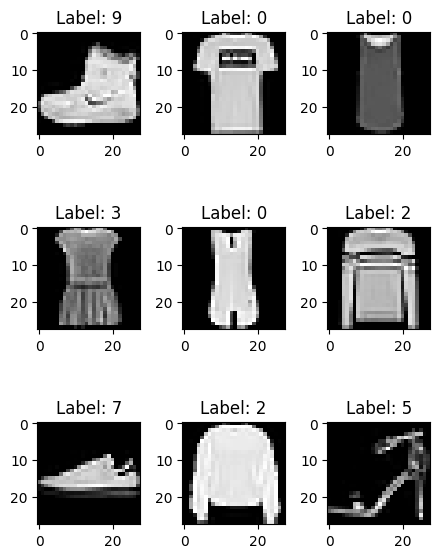

In [6]:
# تعیین تعداد ردیف‌ها
num_row = 3
# تعیین تعداد ستون‌ها
num_col = 3

# ترسیم تصاویر
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
# حلقه برای نمایش تصاویر و برچسب‌ها
for i in range(num):
       # انتخاب مکان هر تصویر در ماتریس subplot
    ax = axes[i//num_col, i%num_col]
         # نمایش تصویر با استفاده از cmap خاکستری
    ax.imshow(images[i], cmap='gray')
         # تعیین عنوان هر تصویر بر اساس برچسب آن
    ax.set_title('Label: {}'.format(labels[i]))
    # تنظیم حاشیه‌ها
plt.tight_layout()
# نمایش نمودارها
plt.show()

In [7]:
# تعریف یک مدل شبکه عصبی با استفاده از کلاس Sequential از کتابخانه TensorFlow
model = tf.keras.models.Sequential([
    #  Flatten برای تبدیل ورودی به یک بعد ورودی با ابعاد (28, 28)
  tf.keras.layers.Flatten(input_shape=(28, 28)),
    #  Dense با 128 نورون و تابع فعال‌سازی ReLU
  tf.keras.layers.Dense(128, activation='relu'),
    #Dropout با نرخ 0.2 برای جلوگیری از بیش‌برازش (overfitting)
  tf.keras.layers.Dropout(0.2),
    # Dense با 10 نورون برای خروجی با استفاده از تابع خطی (بدون فعال‌سازی) به عنوان خروجی 10 کلاس دسته‌بندی
  tf.keras.layers.Dense(10)
])

In [8]:
#پیشبینی مدل برای  x_train  و چاپ کردن ان در یک آرایه با استفاده از numpy
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.08748305, -0.5615013 ,  0.3093729 ,  0.53083384,  0.6247699 ,
        -0.21238707, -0.5491437 , -1.4166636 ,  0.15761562,  1.1770968 ]],
      dtype=float32)

In [9]:
# اعمال تابع softmax بر روی پیش‌بینی‌ها برای تبدیل آن‌ها به احتمالات
tf.nn.softmax(predictions).numpy()

array([[0.08636878, 0.04513428, 0.10782572, 0.13455555, 0.14780785,
        0.06399187, 0.04569549, 0.01919173, 0.09264351, 0.25678524]],
      dtype=float32)

In [10]:
# تعریف تابع هزینه SparseCategoricalCrossentropy برای محاسبه خطا بر اساس پیش‌بینی‌های احتمالی و برچسب‌های دسته‌ای به صورت sparse
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [11]:
# محاسبه خطا برای نمونه اول داده‌های آموزشی با استفاده از تابع هزینه و مقادیر پیش‌بینی، سپس تبدیل نتیجه به آرایه numpy
loss_fn(y_train[:1], predictions).numpy()

1.3595152

In [12]:
# تنظیمات مدل برای آموزش:
# - optimizer='adam': استفاده از الگوریتم بهینه‌سازی Adam برای بهبود وزن‌های مدل
# - loss=loss_fn: استفاده از تابع هزینه loss_fn برای محاسبه خطا در هنگام آموزش مدل
# - metrics=['accuracy']: معیار دقت (accuracy) برای ارزیابی عملکرد مدل در هنگام آموزش
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [13]:
# آموزش مدل با داده‌های ورودی x_train و برچسب‌های y_train به مدت 5 اپوک (epochs)
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5256 - accuracy: 0.8139
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3989 - accuracy: 0.8562
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3648 - accuracy: 0.8659
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3434 - accuracy: 0.8752
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3279 - accuracy: 0.8772


In [14]:
# ارزیابی مدل با استفاده از داده‌های آزمون (x_test و y_test) و نمایش خروجی به صورت verbose=2
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.3462 - accuracy: 0.8730 - 714ms/epoch - 2ms/step


[0.3462037146091461, 0.8730000257492065]

In [15]:
# ایجاد یک مدل جدید که شامل مدل اصلی و یک لایه Softmax برای تبدیل خروجی به احتمالات است.
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [16]:
# اعمال مدل احتمالاتی بر روی پنج داده از مجموعه داده‌های آزمون و نمایش نتایج به صورت احتمالات
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.32103204e-07, 2.45161735e-09, 9.22251342e-09, 9.68432516e-08,
        2.21013892e-08, 6.13191836e-02, 3.77777347e-08, 7.12897032e-02,
        2.17710622e-05, 8.67368877e-01],
       [4.75192282e-05, 3.49269780e-11, 9.98990595e-01, 1.12022542e-08,
        2.16148765e-04, 5.42890732e-10, 7.45566795e-04, 6.83315709e-14,
        1.75134687e-07, 8.15092351e-13],
       [5.22413401e-09, 1.00000000e+00, 4.40590862e-11, 7.46773809e-10,
        8.10320033e-10, 1.67467837e-15, 4.08971555e-12, 1.59272108e-20,
        3.07545161e-14, 8.95955717e-18],
       [9.21270971e-09, 9.99999881e-01, 5.53446733e-10, 6.97472444e-08,
        2.29669594e-09, 6.95108982e-14, 2.11817144e-11, 4.28216390e-18,
        1.34184994e-13, 5.44909551e-15],
       [2.57524520e-01, 3.88003764e-06, 7.01998025e-02, 5.91068016e-03,
        2.57147532e-02, 1.20307479e-04, 6.37727678e-01, 3.87476439e-06,
        2.69036856e-03, 1.04158855e-04]], dtype=float32)>

In [18]:
# وارد کردن کتابخانه‌های مورد نیاز
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# تعداد کلاس‌ها
num_classes = 10

# تعریف مدل
model = Sequential()

# اضافه کردن لایه Flatten برای تبدیل تصاویر به بردارهای یک بعدی
model.add(Flatten(input_shape=(28, 28)))

# اضافه کردن لایه Dense با 256 نورون و فعال‌سازی relu
model.add(Dense(256, activation='relu'))

# اضافه کردن لایه Dense با تعداد نورون‌های برابر با تعداد کلاس‌ها و فعال‌سازی softmax
model.add(Dense(num_classes, activation='softmax'))

# کامپایل مدل با استفاده از الگوریتم بهینه‌سازی adam و تابع هزینه sparse_categorical_crossentropy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# آموزش مدل با داده‌های آموزشی
history = model.fit(x_train, y_train,
                   epochs=20,
                   batch_size=32,
                   validation_data=(x_test, y_test))


Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4815 - accuracy: 0.8299 - val_loss: 0.4121 - val_accuracy: 0.8518
Epoch 2/20
1253/1875 [===================>..........] - ETA: 3s - loss: 0.3710 - accuracy: 0.8662

KeyboardInterrupt: 

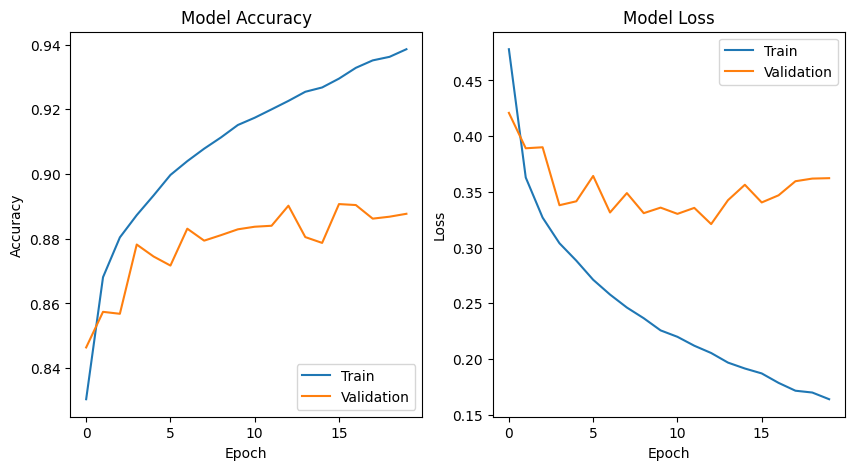

In [18]:
import matplotlib.pyplot as plt
 # تنظیم اندازه شکل
plt.figure(figsize=(10,5))
# نمایش دو نمودار در کنار هم
plt.subplot(1,2,1)
# دقت مدل برای داده‌های آموزشی
plt.plot(history.history['accuracy'])
# دقت مدل برای داده‌های آزمون
plt.plot(history.history['val_accuracy'])
# عنوان جدول
plt.title('Model Accuracy')
# label محور x ها
plt.xlabel('Epoch')
# label محور y ها
plt.ylabel('Accuracy')
#ین کد برای افزودن یک علامت به نمودار است. با این کد، دو عنوان "Train" و "Validation" به نمودار اضافه شده و مکان آنها نیز در پایین سمت راست تعیین شده است.
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1,2,2)
# loss مدل برای داده‌های آموزشی
plt.plot(history.history['loss'])
## val_loss مدل برای داده‌های آزمون
plt.plot(history.history['val_loss'])
# عنوان جدول
plt.title('Model Loss')
# label محور x ها
plt.xlabel('Epoch')
# label محور y ها
plt.ylabel('Loss')
#ین کد برای افزودن یک علامت به نمودار است. با این کد، دو عنوان "Train" و "Validation" به نمودار اضافه شده و مکان آنها نیز در بالا سمت راست تعیین شده است.
plt.legend(['Train', 'Validation'], loc='upper right')
#نمایش نمودار
plt.show()

الف

313/313 [==============================] - 1s 3ms/step - loss: 0.3647 - accuracy: 0.8965


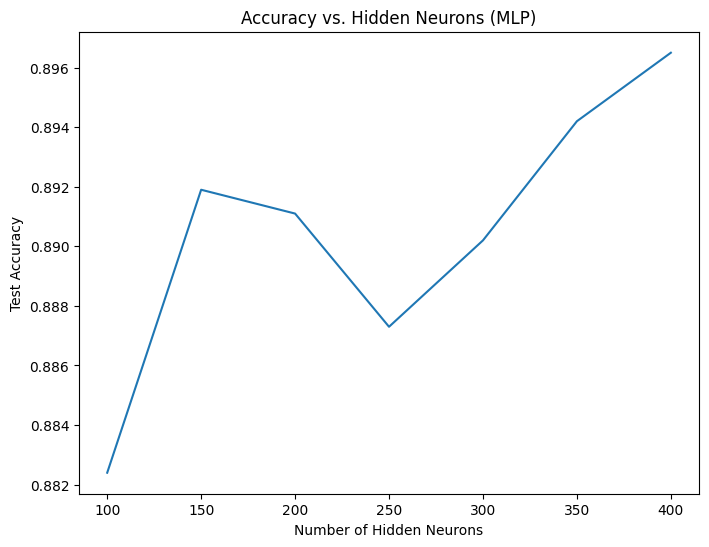

In [19]:
# تعریف تعداد نورون‌های مخفی مورد بررسی و یک لیست برای ذخیره دقت‌ها
hidden_neurons = [100, 150, 200, 250, 300, 350, 400]
accuracies = []
# برای هر تعداد نورون‌های مخفی
for neurons in hidden_neurons:
      # ساخت یک مدل شبکه عصبی با یک لایه مخفی و تعداد نورون‌های مشخص
    model = Sequential()
    # لایه ورودی
    model.add(Flatten(input_shape=(28, 28)))
     # لایه مخفی
    model.add(Dense(neurons, activation='relu'))
    # لایه خروجی
    model.add(Dense(num_classes, activation='softmax'))
    # کامپایل مدل
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    #آموزش مدل
    model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test), verbose=0)
     # اضافه کردن دقت مدل به لیست
    accuracies.append(model.evaluate(x_test, y_test)[1])
# رسم نمودار دقت در مقابل تعداد نورون‌های مخفی
plt.figure(figsize=(8,6))
plt.plot(hidden_neurons, accuracies)
# نام گذاری محور x
plt.xlabel('Number of Hidden Neurons')
# نام گذاری محور y
plt.ylabel('Test Accuracy')
# نام گذاری نمودار
plt.title('Accuracy vs. Hidden Neurons (MLP)')
#نمایش نمودار
plt.show()

In [20]:
# این دو خط متغیرهایی به نام hidden_neurons1 و hidden_neurons2 را تعریف می کنند که به ترتیب تعداد نورون های لایه مخفی اول و دوم شبکه عصبی را مشخص می کنند. مقادیر این متغیرها 200 و 100 هستند که نشان می دهد لایه مخفی اول 200 نورون و لایه مخفی دوم 100 نورون خواهد داشت.
hidden_neurons1 = 200  # تعداد نورون‌های لایه مخفی اول
hidden_neurons2 = 100  # تعداد نورون‌های لایه مخفی دوم
# این خط یک مدل شبکه عصبی از نوع Sequential را با استفاده از کتابخانه Keras ایجاد می کند. مدل های Sequential ساختاری ساده دارند که در آن لایه ها به ترتیب یک به یک به هم متصل می شوند.
model = Sequential()  # ساخت یک مدل شبکه عصبی
# این خط لایه ورودی را به مدل اضافه می کند. لایه Flatten داده های ورودی را که به صورت تصاویر 28 در 28 پیکسل هستند، به یک آرایه تک بعدی تبدیل می کند. این آرایه سپس به عنوان ورودی به لایه های بعدی ارسال می شود.
model.add(Flatten(input_shape=(28, 28)))  # لایه ورودی
# این خط لایه مخفی اول را به مدل اضافه می کند. لایه Dense یک لایه کاملاً متصل است که در آن هر نورون به همه نورون های لایه قبلی متصل می شود. در این مورد، لایه مخفی اول 200 نورون دارد و از تابع فعال سازی relu استفاده می کند.
model.add(Dense(hidden_neurons1, activation='relu'))  # لایه مخفی اول
# این خط لایه مخفی دوم را به مدل اضافه می کند. این لایه نیز از نوع Dense است و 100 نورون دارد. از تابع فعال سازی relu نیز در این لایه استفاده می شود.
model.add(Dense(hidden_neurons2, activation='relu'))  # لایه مخفی دوم
# این خط لایه خروجی را به مدل اضافه می کند
# لایه Dense در این خط تعداد نورون هایش برابر با تعداد کلاس های موجود در مجموعه داده است (num_classes این تعداد کلاس ها  را نشان می دهد). از تابع فعال سازی softmax در این لایه استفاده می شود که مقادیر خروجی را به مقادیر بین 0 و 1 تبدیل می کند و احتمال هر کلاس را نشان می دهد.
model.add(Dense(num_classes, activation='softmax'))  # لایه خروجی
# این کد مدل را با استفاده از تابع compile کامپایل می کند. این تابع پارامترهای مختلفی را برای آموزش مدل تنظیم می کند، از جمله:
# optimizer: الگوریتم بهینه سازی که برای به روز رسانی وزن های مدل در طول آموزش استفاده می شود. در این مورد، از الگوریتم adam استفاده می شود.
# loss: تابع تلفات که برای محاسبه خطای مدل در طول آموزش استفاده می شود. در این مورد، از تابع sparse_categorical_crossentropy استفاده می شود که برای دسته‌بندی چند کلاسه مناسب است.
# metrics: لیستی از معیارهای عملکرد که باید در طول آموزش محاسبه شوند. در این مورد، فقط از معیار accuracy استفاده می شود که دقت مدل را در پیش بینی کلاس های صحیح نشان می دهد.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # کامپایل مدل
# مدل را با استفاده از تابع fit آموزش می دهد. این تابع داده های آموزشی (x_train و y_train) و همچنین پارامترهای مختلفی را برای آموزش مدل دریافت می کند، از جمله:
# epochs: تعداد دفعاتی که مدل
#Batch Size تعداد نمونه‌ها در هر بخش را که برای یک تکرار آموزشی استفاده می‌شود، تعیین می‌کند.
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))  # آموزش مدل


Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4781 - accuracy: 0.8271 - val_loss: 0.4159 - val_accuracy: 0.8534
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3622 - accuracy: 0.8666 - val_loss: 0.3952 - val_accuracy: 0.8568
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3245 - accuracy: 0.8799 - val_loss: 0.3707 - val_accuracy: 0.8637
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3014 - accuracy: 0.8897 - val_loss: 0.3481 - val_accuracy: 0.8788
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2834 - accuracy: 0.8944 - val_loss: 0.3455 - val_accuracy: 0.8799
Epoch 6/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2708 - accuracy: 0.8990 - val_loss: 0.3633 - val_accuracy: 0.8754
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2578 - accuracy: 0.9036 - val_loss: 0.3369 - val_ac

In [21]:
# این خط کتابخانه Keras را برای استفاده از لایه Dropout در مدل شبکه عصبی شما وارد می کند. Dropout تکنیکی برای جلوگیری از overfitting در شبکه های عصبی است.
from tensorflow.keras.layers import Dropout  # وارد کردن لایه Dropout از کتابخانه Keras
# این خط یک مدل شبکه عصبی از نوع Sequential را با استفاده از کتابخانه Keras ایجاد می کند. مدل های Sequential ساختاری ساده دارند که در آن لایه ها به ترتیب یک به یک به هم متصل می شوند.
model = Sequential()
# این خط لایه ورودی را به مدل اضافه می کند. لایه Flatten داده های ورودی را که به صورت تصاویر 28 در 28 پیکسل هستند، به یک آرایه تک بعدی تبدیل می کند. این آرایه سپس به عنوان ورودی به لایه های بعدی ارسال می شود.
model.add(Flatten(input_shape=(28, 28)))
# این خط لایه مخفی را به مدل اضافه می کند. لایه Dense یک لایه کاملاً متصل است که در آن هر نورون به همه نورون های لایه قبلی متصل می شود. در این مورد، لایه مخفی 256 نورون دارد و از تابع فعال سازی relu استفاده می کند.
model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))  # اعمال Dropout با نرخ 0.5
model.add(Dense(num_classes, activation='softmax'))  # لایه خروجی
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # کامپایل مدل
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))  # آموزش مدل

Epoch 1/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5750 - accuracy: 0.7927 - val_loss: 0.4464 - val_accuracy: 0.8409
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4475 - accuracy: 0.8359 - val_loss: 0.4108 - val_accuracy: 0.8498
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4150 - accuracy: 0.8493 - val_loss: 0.3941 - val_accuracy: 0.8540
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3935 - accuracy: 0.8560 - val_loss: 0.3969 - val_accuracy: 0.8513
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3774 - accuracy: 0.8619 - val_loss: 0.3755 - val_accuracy: 0.8671
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3692 - accuracy: 0.8653 - val_loss: 0.3568 - val_accuracy: 0.8728
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3617 - accuracy: 0.8676 - val_loss: 0.3584 - val_ac

In [22]:
from tensorflow.keras.callbacks import EarlyStopping  # وارد کردن کلاس EarlyStopping از کتابخانه Keras

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)  # تعریف استاپ‌کردن زودهنگام با پارامترهای مناسب

model = Sequential()  # ایجاد یک مدل Sequential
model.add(Flatten(input_shape=(28, 28)))  # اضافه کردن لایه Flatten با ابعاد ورودی
model.add(Dense(256, activation='relu'))  # اضافه کردن لایه مخفی با 256 نورون و فعال‌ساز relu
model.add(Dense(num_classes, activation='softmax'))  # اضافه کردن لایه خروجی با تابع فعال‌ساز softmax

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # کامپایل مدل با متریک دقت
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])
                    # آموزش مدل با استفاده از داده‌های آموزش و تست و استفاده از استاپ‌کردن زودهنگام

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4823 - accuracy: 0.8300 - val_loss: 0.3918 - val_accuracy: 0.8586
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3644 - accuracy: 0.8672 - val_loss: 0.3773 - val_accuracy: 0.8645
Epoch 3/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3284 - accuracy: 0.8789 - val_loss: 0.3710 - val_accuracy: 0.8678
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3031 - accuracy: 0.8884 - val_loss: 0.3637 - val_accuracy: 0.8677
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2853 - accuracy: 0.8930 - val_loss: 0.3561 - val_accuracy: 0.8712
Epoch 6/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2694 - accuracy: 0.8993 - val_loss: 0.3408 - val_accuracy: 0.8736
Epoch 7/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2600 - accuracy: 0.9027 - val_loss: 0.3267 - val_ac

In [ ]:

optimizers = ['sgd', 'rmsprop', 'adam', 'adagrad']
accuracies = []

for optimizer in optimizers:
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test), verbose=0)
    accuracies.append(model.evaluate(x_test, y_test)[1])

plt.figure(figsize=(8,6))
plt.bar(optimizers, accuracies)
plt.xlabel('Optimizer')
plt.ylabel('Test Accuracy')
plt.title('Accuracy vs. Optimizer')
plt.show()

313/313 [==============================] - 1s 3ms/step - loss: 0.4079 - accuracy: 0.8784


Epoch 1/10
1500/1500 [==============================] - 52s 34ms/step - loss: 0.4750 - accuracy: 0.8250 - val_loss: 0.3456 - val_accuracy: 0.8738
Epoch 2/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.3157 - accuracy: 0.8843 - val_loss: 0.3153 - val_accuracy: 0.8820
Epoch 3/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2684 - accuracy: 0.9014 - val_loss: 0.2951 - val_accuracy: 0.8865
Epoch 4/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2364 - accuracy: 0.9121 - val_loss: 0.2535 - val_accuracy: 0.9060
Epoch 5/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2079 - accuracy: 0.9234 - val_loss: 0.2693 - val_accuracy: 0.9032
Epoch 6/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.1864 - accuracy: 0.9301 - val_loss: 0.2522 - val_accuracy: 0.9101
Epoch 7/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.1654 - accuracy: 0.9379 - val_loss: 0.2448 -

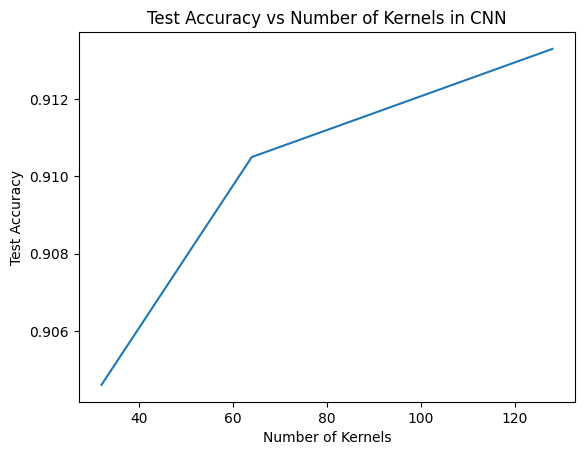

In [24]:
# وارد کردن لایه‌های Conv2D و MaxPooling2D از کتابخانه Keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
# ساخت یک مدل شبکه عصبی با استفاده از Sequential
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # لایه Conv2D با 32 کرنل و فعال‌ساز relu
    MaxPooling2D((2, 2)),  # لایه MaxPooling با اندازه (2, 2)
    Conv2D(64, (3, 3), activation='relu'),  # لایه دوم Conv2D با 64 کرنل و فعال‌ساز relu
    MaxPooling2D((2, 2)),  # لایه دوم MaxPooling با اندازه (2, 2)
    Flatten(),  # لایه Flatten برای تغییر ابعاد
    Dense(128, activation='relu'),  # لایه مخفی با 128 نورون و فعال‌ساز relu
    Dense(10, activation='softmax')  # لایه خروجی با فعال‌ساز softmax
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# تغییر ابعاد تصاویر برای اضافه کردن ابعاد رنگی
x_tarin_exp = np.expand_dims(x_train , axis=-1)
x_test_exp = np.expand_dims(x_test , axis=-1)

history = model.fit(x_tarin_exp, y_train, epochs=10, validation_split=0.2, verbose=1)

# تغییر تعداد کرنل‌ها و بررسی نتایج
kernel_configs = [32, 64, 128]
cnn_accuracies = []
for kernels in kernel_configs:  # برای هر اندازه کرنل در تنظیمات کرنل
    model = Sequential([  # ایجاد یک مدل Sequential
        Conv2D(kernels, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # اضافه کردن لایه Conv2D با تعداد کرنل‌ها و ابعاد کرنل و فعال‌ساز relu و ابعاد ورودی
        MaxPooling2D((2, 2)),  # اضافه کردن لایه MaxPooling2D با ابعاد پنجره
        Conv2D(kernels*2, (3, 3), activation='relu'),  # اضافه کردن لایه Conv2D با تعداد کرنل‌ها ضربدر ۲ و ابعاد کرنل و فعال‌ساز relu
        MaxPooling2D((2, 2)),  # اضافه کردن لایه MaxPooling2D با ابعاد پنجره
        Flatten(),  # اضافه کردن لایه Flatten
        Dense(128, activation='relu'),  # اضافه کردن لایه مخفی با ۱۲۸ نورون و فعال‌ساز relu
        Dense(10, activation='softmax')  # اضافه کردن لایه خروجی با تابع فعال‌ساز softmax
    ])

    model.compile(optimizer='adam',  # کامپایل مدل با بهینه‌ساز adam
                  loss='sparse_categorical_crossentropy',  # استفاده از تابع هزینه sparse_categorical_crossentropy
                  metrics=['accuracy'])  # استفاده از معیار دقت

    history = model.fit(x_tarin_exp, y_train, epochs=10, validation_split=0.2, verbose=1)  # آموزش مدل با داده‌های آموزش و اعتبارسنجی و نمایش پیشرفت
    test_loss, test_acc = model.evaluate(x_test_exp , y_test , verbose=0)  # ارزیابی مدل بر روی داده‌های آزمون
    cnn_accuracies.append(test_acc)  # ذخیره دقت مدل در لیست دقت‌ها

# رسم نمودار دقت آزمون بر حسب تعداد کرنل‌ها
plt.plot(kernel_configs, cnn_accuracies)
# نام گذاری محور x
plt.xlabel('Number of Kernels')
# نام گذاری محور y
plt.ylabel('Test Accuracy')
# نام گذاری نمودار
plt.title('Test Accuracy vs Number of Kernels in CNN')
# رسم نمودار
plt.show()